In [28]:
#importing libraries to build and train CNN model
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score ,accuracy_score,precision_score
RANDOM_SEED=2021
TEST_PCT=0.3
LABELS=['Normal','Fraud']


In [30]:
dataset = pd.read_csv(r"creditcard.csv")
print(list(dataset.columns))
dataset.describe()


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
#check for null values
print("Any nulls in the dataset ",dataset.isnull().values.any())
print('------')
print('No of unique labels', len(dataset['Class'].unique()))
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print('break down of the normal and fraud transaction')
print(pd.value_counts(dataset['Class'],sort = True))


Any nulls in the dataset  False
------
No of unique labels 2
-------
break down of the normal and fraud transaction
0    284315
1       492
Name: Class, dtype: int64


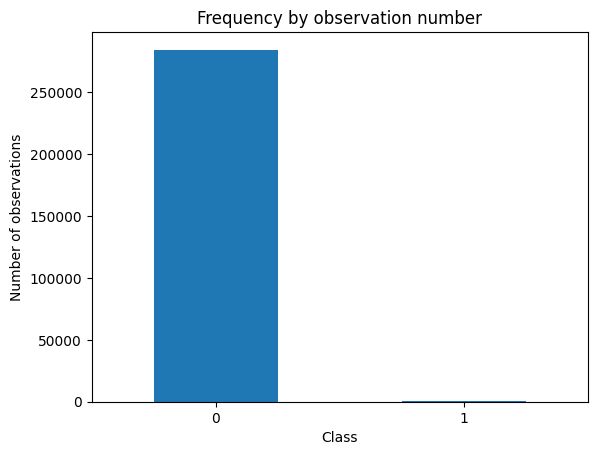

In [32]:
#visualizing the imbalanced dataset
count_classes= pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title('Frequency by observation number')
plt.xlabel('Class')
plt.ylabel('Number of observations');

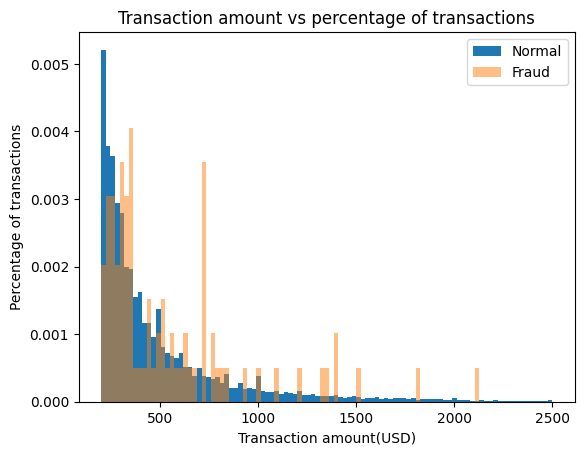

In [33]:
#Save the normal and fraudulent transaction in separate dataframe
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]
#visualize transaction amounts for normal and fraudlant transactions
bins = np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title('Transaction amount vs percentage of transactions')
plt.xlabel('Transaction amount(USD)')
plt.ylabel('Percentage of transactions')
plt.show()


In [34]:
'''Time and Amount are the columns that aer not scaled , so applying StandardScaler to only Amount and time columns. \n Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that aer not scaled , so applying StandardScaler to only Amount and time columns. \n Normalizing the values between 0 and 1 did not work great for the dataset.'

In [35]:
#Here, the 'Time' and 'Amount' columns are scaled using StandardScaler to prepare the data for model training.
sc=StandardScaler()
dataset['Time']=sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))



In [36]:
'''The last column in the dataset is our target variable.'''
raw_data = dataset.values
#the last element contains if the transaction is normal which is represented
labels = raw_data[:,-1]
#the other data points are the electrocardriogram data
data= raw_data[:,0:-1]
train_data,test_data,train_labels,test_labels=train_test_split(
    data,labels,test_size=0.2,random_state=2021
)

In [37]:
'''Normalize the data to gave a value between 0 and 1'''
#calculate min and max
min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)
#performing min max normalization
train_data=(train_data - min_val)/(max_val - min_val)
test_data=(test_data - min_val)/(max_val - min_val)
#convert the data into float
train_data=tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)


In [38]:
'''Use only normal transactions to train the Autoencoder.
Normal data has a value of 0 in the target variable. Using the target variable'''
#array to bool
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print('No. of records in fraud train data=',len(fraud_train_data))
print('No. of records in Normal train data=',len(normal_train_data))
print('No. of records in fraud test data=',len(fraud_test_data))
print('No. of records in Normal test data=',len(normal_test_data))

No. of records in fraud train data= 389
No. of records in Normal train data= 227456
No. of records in fraud test data= 103
No. of records in Normal test data= 56859


In [39]:
nb_epoch = 50
#batch size : no of samples that will be used in each iteration
batch_size= 64
input_dim = normal_train_data.shape[1] #num of columns ,30
#no of neurons
encoding_dim=14
hidden_dim_1=int(encoding_dim/2)
hidden_dim_2=4
# step size at each iteration
learning_rate= 1e-7


In [40]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
#regularization technique that randomly sets 20% of the input units to 0 at each update during training, which helps prevent overfitting.
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_6 (Dense)             (None, 14)                434       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
 dense_9 (Dense)             (None, 7)                 35        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0   

In [41]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
#The EarlyStopping callback is used to stop the training process when a monitored quantity (in this case, validation loss) has stopped improving
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

In [42]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [43]:
#Train the Autoencoder

history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3543/3554 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.0176
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 13s 3ms/step - loss: 0.0049 - accuracy: 0.0176 - val_loss: 2.0387e-05 - val_accuracy: 0.0269
Epoch 2/50
  54/3554 [..............................] - ETA: 10s - loss: 1.8494e-05 - accuracy: 0.0211

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3535/3554 [============================>.] - ETA: 0s - loss: 1.9379e-05 - accuracy: 0.0528
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 13s 4ms/step - loss: 1.9379e-05 - accuracy: 0.0530 - val_loss: 1.9982e-05 - val_accuracy: 0.0596
Epoch 3/50
3543/3554 [============================>.] - ETA: 0s - loss: 1.9364e-05 - accuracy: 0.0640
Epoch 3: val_loss did not improve from 0.00002
3554/3554 [==============================] - 11s 3ms/step - loss: 1.9369e-05 - accuracy: 0.0639 - val_loss: 2.0266e-05 - val_accuracy: 0.0251
Epoch 4/50
3546/3554 [============================>.] - ETA: 0s - loss: 1.9475e-05 - accuracy: 0.0610
Epoch 4: val_loss did not improve from 0.00002
3554/3554 [==============================] - 11s 3ms/step - loss: 1.9478e-05 - accuracy: 0.0610 - val_loss: 2.0053e-05 - val_accuracy: 0.0363
Epoch 5/50
3543/3554 [============================>.] - ETA: 0s - loss: 1.9479e-05 - accuracy: 0

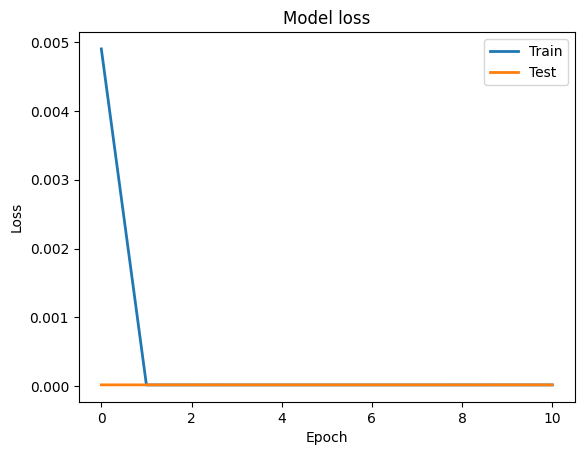

In [44]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [45]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data,
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

1781/1781 [==============================] - 3s 2ms/step


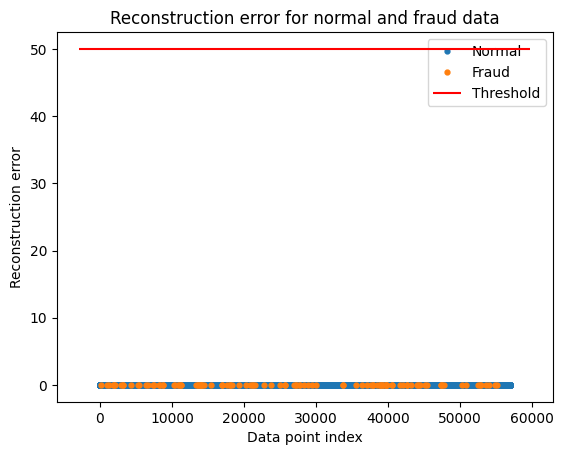

In [46]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

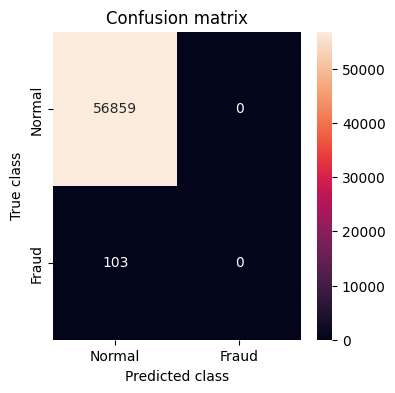

 Accuracy:  0.9981917769741231
 Recall:  0.0
 Precision:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold.
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''
#Any data point with a reconstruction error greater than this threshold is considered an anomaly.
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

In [48]:
'''As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

Things to further improve precision and recall would add more relevant features,
different architecture for autoencoder, different hyperparameters, or a different algorithm.'''

'As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.\n\nThings to further improve precision and recall would add more relevant features, \ndifferent architecture for autoencoder, different hyperparameters, or a different algorithm.'

In [49]:
history

{'loss': [0.004901435226202011,
  1.9379256627871655e-05,
  1.9369197616470046e-05,
  1.9478087779134512e-05,
  1.9476765373838134e-05,
  1.9486076780594885e-05,
  1.948396493389737e-05,
  1.946179872902576e-05,
  1.948356111824978e-05,
  1.9553397578420117e-05,
  1.945440635608975e-05],
 'accuracy': [0.017568232491612434,
  0.0529509000480175,
  0.06392005831003189,
  0.06096123903989792,
  0.060354530811309814,
  0.05979178473353386,
  0.06058754399418831,
  0.05894766375422478,
  0.060152292251586914,
  0.0599544532597065,
  0.06315506994724274],
 'val_loss': [2.038724414887838e-05,
  1.99818387045525e-05,
  2.0265717466827482e-05,
  2.005267742788419e-05,
  2.0121111447224393e-05,
  2.0152774595771916e-05,
  2.008193769142963e-05,
  2.0153682271484286e-05,
  1.9962810256402008e-05,
  2.030828909482807e-05,
  2.0109922843403183e-05],
 'val_accuracy': [0.026895122602581978,
  0.059636250138282776,
  0.025122011080384254,
  0.03630490601062775,
  0.026895122602581978,
  0.025122011080